In [4]:
!pip install memory_profiler

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import time
from itertools import product

# Problem 1: Scheduling TV Commercials to Maximize Impact

**Greedy Approach (Job Sequencing with Deadlines)**

* Input/Output: Input list of ads with (id, deadline, profit); output selected ad slots and total revenue.

* Time complexity: Best O(n log n), Average O(n log n), Worst O(n²) where n is number of ads; dominated by sorting and slot finding.

* Space usage: O(n) for storing slots array.

* Suitability/trade-offs: Optimal for maximizing revenue with deadline constraints; simple and efficient; always picks highest profit jobs first; excellent for media scheduling where time slots are limited; doesn't handle overlapping durations.

Problem 1: TV Commercial Scheduling

Available Commercials (id, deadline, profit):
('Ad1', 4, 70)
('Ad2', 2, 60)
('Ad3', 4, 50)
('Ad4', 3, 40)
('Ad5', 1, 30)
('Ad6', 4, 20)
('Ad7', 2, 10)

Scheduled (id, slot, profit):
('Ad4', 1, 40)
('Ad2', 2, 60)
('Ad3', 3, 50)
('Ad1', 4, 70)

Total Revenue: $220


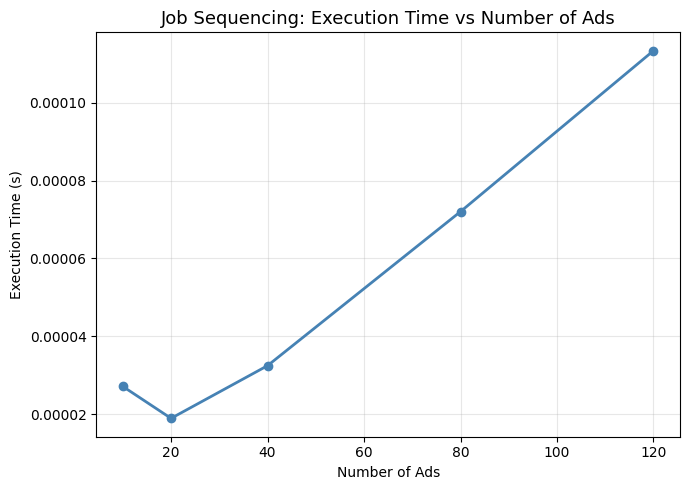

In [29]:
# Problem 1: TV Commercial Scheduling (Greedy: Job Sequencing with Deadlines)

import time
import random
import matplotlib.pyplot as plt

def job_sequencing(ads):
    """
    Schedule TV commercials using Greedy Job Sequencing.
    ads: list of tuples (ad_id, deadline, profit)
    Returns: total_revenue, scheduled_ads(list of (ad_id, slot1_indexed, profit))
    """
    if not ads:
        return 0, []
    # Sort by profit desc
    ads_sorted = sorted(ads, key=lambda x: x[2], reverse=True)
    max_deadline = max(d for _, d, _ in ads)
    slots = [None] * max_deadline
    total = 0
    scheduled = []
    for ad_id, deadline, profit in ads_sorted:
        for s in range(min(deadline, max_deadline) - 1, -1, -1):
            if slots[s] is None:
                slots[s] = (ad_id, profit)
                scheduled.append((ad_id, s + 1, profit))
                total += profit
                break
    scheduled.sort(key=lambda x: x[1])
    return total, scheduled

# Demo input
print("Problem 1: TV Commercial Scheduling")
print("=" * 60)
commercials = [
    ("Ad1", 4, 70), ("Ad2", 2, 60), ("Ad3", 4, 50),
    ("Ad4", 3, 40), ("Ad5", 1, 30), ("Ad6", 4, 20), ("Ad7", 2, 10),
]
print("\nAvailable Commercials (id, deadline, profit):")
for c in commercials:
    print(c)

total, scheduled = job_sequencing(commercials)
print("\nScheduled (id, slot, profit):")
for row in scheduled:
    print(row)
print(f"\nTotal Revenue: ${total}")

# Single visualization: execution time vs number of ads
sizes = [10, 20, 40, 80, 120]
times = []
for n in sizes:
    test_ads = [(f"Ad{i}", random.randint(1, max(1, n // 2)), random.randint(10, 200)) for i in range(n)]
    t0 = time.perf_counter()
    _ = job_sequencing(test_ads)
    times.append(time.perf_counter() - t0)

plt.figure(figsize=(7, 5))
plt.plot(sizes, times, marker='o', linewidth=2, color='steelblue')
plt.title('Job Sequencing: Execution Time vs Number of Ads', fontsize=13)
plt.xlabel('Number of Ads')
plt.ylabel('Execution Time (s)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Problem 2: Maximizing Profit with Limited Budget

**Dynamic Programming (0/1 Knapsack)**

* Input/Output: Input lists of costs (weights), profits (values), and budget (capacity); output maximum profit achievable and selected items.

* Time complexity: Best O(n*W), Average O(n*W), Worst O(n*W) where n is items and W is budget.

* Space usage: O(n*W) for DP table; can be optimized to O(W) with rolling array.

* Suitability/trade-offs: Guarantees optimal solution for discrete items; pseudo-polynomial time; ideal for investment/resource selection; cannot take fractions.

Problem 2: Budget-Constrained Profit Maximization (0/1 Knapsack)

Projects (name, cost, profit):
Project A 10 60
Project B 20 100
Project C 30 120
Project D 15 80
Project E 25 90

Selected indices: [0, 1, 3]
Selected projects:
Project A 10 60
Project B 20 100
Project D 15 80
Total Profit: $240, Budget Used: 45 / 50


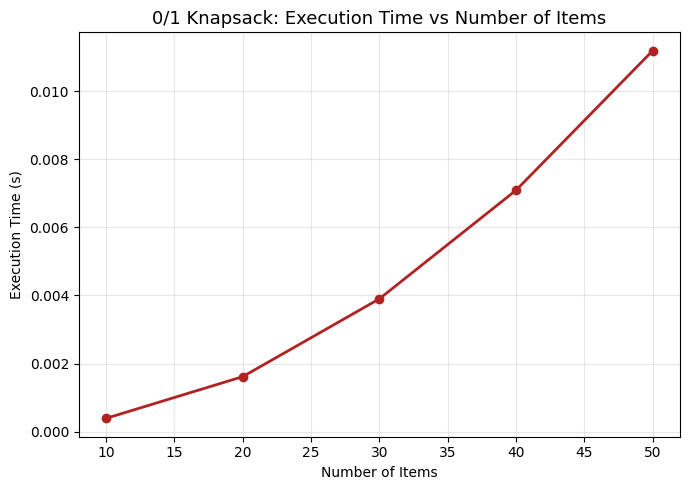

In [31]:
# Problem 2: 0/1 Knapsack (Dynamic Programming)

import time
import random
import matplotlib.pyplot as plt

def knapsack_01_dp(costs, profits, budget):
    """
    0/1 Knapsack via DP.
    Returns: max_profit, selected_indices
    """
    n = len(costs)
    if n == 0 or budget <= 0:
        return 0, []
    dp = [[0] * (budget + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        c, p = costs[i - 1], profits[i - 1]
        for w in range(0, budget + 1):
            dp[i][w] = dp[i - 1][w]
            if c <= w:
                dp[i][w] = max(dp[i][w], p + dp[i - 1][w - c])
    selected = []
    w = budget
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected.append(i - 1)
            w -= costs[i - 1]
    selected.reverse()
    return dp[n][budget], selected

# Demo input
print("Problem 2: Budget-Constrained Profit Maximization (0/1 Knapsack)")
print("=" * 60)
names = ["Project A", "Project B", "Project C", "Project D", "Project E"]
costs = [10, 20, 30, 15, 25]
profits = [60, 100, 120, 80, 90]
budget = 50
print("\nProjects (name, cost, profit):")
for i, nm in enumerate(names):
    print(nm, costs[i], profits[i])
max_profit, sel = knapsack_01_dp(costs, profits, budget)
print(f"\nSelected indices: {sel}")
print("Selected projects:")
for idx in sel:
    print(names[idx], costs[idx], profits[idx])
print(f"Total Profit: ${max_profit}, Budget Used: {sum(costs[i] for i in sel)} / {budget}")

# Single visualization: execution time vs number of items
sizes = [10, 20, 30, 40, 50]
times = []
for n in sizes:
    test_costs = [random.randint(5, 50) for _ in range(n)]
    test_profits = [random.randint(10, 150) for _ in range(n)]
    test_budget = max(1, n * 15)
    t0 = time.perf_counter()
    _ = knapsack_01_dp(test_costs, test_profits, test_budget)
    times.append(time.perf_counter() - t0)

plt.figure(figsize=(7, 5))
plt.plot(sizes, times, marker='o', linewidth=2, color='firebrick')
plt.title('0/1 Knapsack: Execution Time vs Number of Items', fontsize=13)
plt.xlabel('Number of Items')
plt.ylabel('Execution Time (s)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Problem 3: Solving Sudoku Puzzle

**Backtracking Algorithm**

* Input/Output: Input partially filled 9x9 Sudoku grid; output completed valid Sudoku solution.

* Time complexity: Best O(1) for nearly complete puzzles, Average O(9^m), Worst O(9^m) where m is number of empty cells.

* Space usage: O(m) for recursion stack depth where m is empty cells.

* Suitability/trade-offs: Guarantees finding solution if exists; explores all possibilities systematically; can be slow for difficult puzzles with many empty cells; excellent for constraint satisfaction problems; benefits from heuristics like most-constrained-variable.


Problem 3: Sudoku Solver (Backtracking)

Initial Puzzle:
5 3 . | . 7 . | . . . 
6 . . | 1 9 5 | . . . 
. 9 8 | . . . | . 6 . 
---------------------
8 . . | . 6 . | . . 3 
4 . . | 8 . 3 | . . 1 
7 . . | . 2 . | . . 6 
---------------------
. 6 . | . . . | 2 8 . 
. . . | 4 1 9 | . . 5 
. . . | . 8 . | . 7 9 

Solution:
5 3 4 | 6 7 8 | 9 1 2 
6 7 2 | 1 9 5 | 3 4 8 
1 9 8 | 3 4 2 | 5 6 7 
---------------------
8 5 9 | 7 6 1 | 4 2 3 
4 2 6 | 8 5 3 | 7 9 1 
7 1 3 | 9 2 4 | 8 5 6 
---------------------
9 6 1 | 5 3 7 | 2 8 4 
2 8 7 | 4 1 9 | 6 3 5 
3 4 5 | 2 8 6 | 1 7 9 

Solved in 0.052027 s


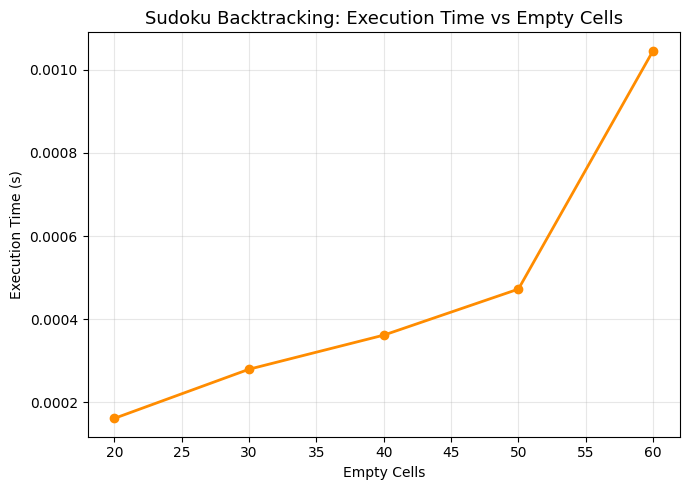

In [32]:
# Problem 3: Sudoku Solver (Backtracking)

import time
import random
import matplotlib.pyplot as plt
import copy

def is_valid(board, r, c, num):
    # Row
    if num in board[r]:
        return False
    # Column
    if num in [board[i][c] for i in range(9)]:
        return False
    # Box
    br, bc = 3 * (r // 3), 3 * (c // 3)
    for i in range(br, br + 3):
        for j in range(bc, bc + 3):
            if board[i][j] == num:
                return False
    return True

def solve_sudoku(board):
    # Find empty cell
    for r in range(9):
        for c in range(9):
            if board[r][c] == 0:
                for num in range(1, 10):
                    if is_valid(board, r, c, num):
                        board[r][c] = num
                        if solve_sudoku(board):
                            return True
                        board[r][c] = 0
                return False
    return True

def print_board(board):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")
            print(board[i][j] if board[i][j] != 0 else ".", end=" ")
        print()

# Demo puzzle
print("Problem 3: Sudoku Solver (Backtracking)")
print("=" * 60)
puzzle = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9]
]
print("\nInitial Puzzle:")
print_board(puzzle)
sol = copy.deepcopy(puzzle)
t0 = time.perf_counter()
ok = solve_sudoku(sol)
t1 = time.perf_counter() - t0
if ok:
    print("\nSolution:")
    print_board(sol)
    print(f"\nSolved in {t1:.6f} s")
else:
    print("\nNo solution found.")

# Single visualization: execution time vs empty cells (synthetic)
def generate_puzzle(empty_cells):
    # Very simple generator: start from solved grid via backtracking, then remove cells
    base = [[0]*9 for _ in range(9)]
    solve_sudoku(base)  # produces a valid filled grid
    # remove cells
    cells = [(i, j) for i in range(9) for j in range(9)]
    random.shuffle(cells)
    for k in range(min(empty_cells, 81)):
        i, j = cells[k]
        base[i][j] = 0
    return base

empties = [20, 30, 40, 50, 60]
times = []
for e in empties:
    puz = generate_puzzle(e)
    t0 = time.perf_counter()
    _ = solve_sudoku(puz)
    times.append(time.perf_counter() - t0)

plt.figure(figsize=(7, 5))
plt.plot(empties, times, marker='o', linewidth=2, color='darkorange')
plt.title('Sudoku Backtracking: Execution Time vs Empty Cells', fontsize=13)
plt.xlabel('Empty Cells')
plt.ylabel('Execution Time (s)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Problem 4: Password Cracking (Naive)

**Brute-Force Algorithm**

* Input/Output: Input target password and character set; output matched password and number of attempts.

* Time complexity: Best O(1) if first guess, Average O(c^(n/2)), Worst O(c^n) where c is charset size and n is password length.

* Space usage: O(n) for storing current attempt string.

* Suitability/trade-offs: Exhaustive search guarantees finding password; exponentially slow; demonstrates importance of strong passwords; impractical for long passwords or large charsets; used to understand password strength and security requirements.


Problem 4: Password Cracking (Brute-Force)

Charset: 'abc123' (size=6)
Password   Len   Attempts     Time (s)  
----------------------------------------
a          1     1            0.000015  
ab         2     8            0.000011  
abc        3     51           0.000019  
a1         2     10           0.000006  
1a2        3     155          0.000057  


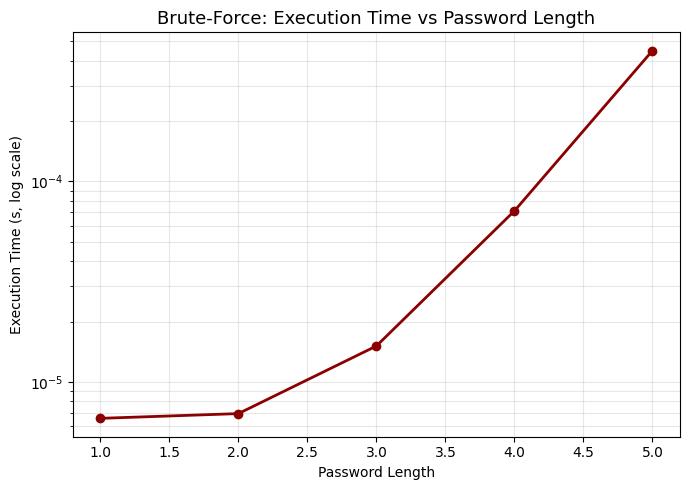

In [33]:
# Problem 4: Password Cracking (Naive Brute-Force)

import time
from itertools import product
import matplotlib.pyplot as plt

def crack_password_bruteforce(target_password, charset):
    """
    Attempt to crack password by exhaustive enumeration up to len(target_password).
    Returns: found_password_or_None, attempts_count
    """
    attempts = 0
    L = len(target_password)
    for length in range(1, L + 1):
        for tup in product(charset, repeat=length):
            attempts += 1
            if ''.join(tup) == target_password:
                return ''.join(tup), attempts
    return None, attempts

# Demo
print("Problem 4: Password Cracking (Brute-Force)")
print("=" * 60)
charset = "abc123"
tests = ["a", "ab", "abc", "a1", "1a2"]
print(f"\nCharset: '{charset}' (size={len(charset)})")
print(f"{'Password':<10} {'Len':<5} {'Attempts':<12} {'Time (s)':<10}")
print("-" * 40)
for pwd in tests:
    t0 = time.perf_counter()
    found, attempts = crack_password_bruteforce(pwd, charset)
    dt = time.perf_counter() - t0
    print(f"{pwd:<10} {len(pwd):<5} {attempts:<12} {dt:<10.6f}")

# Single visualization: execution time vs password length
lengths = [1, 2, 3, 4, 5]
times = []
for L in lengths:
    target = charset[0] * L  # worst-ish early segments aside, fixed target
    t0 = time.perf_counter()
    _ = crack_password_bruteforce(target, charset)
    times.append(time.perf_counter() - t0)

plt.figure(figsize=(7, 5))
plt.semilogy(lengths, times, marker='o', linewidth=2, color='darkred')
plt.title('Brute-Force: Execution Time vs Password Length', fontsize=13)
plt.xlabel('Password Length')
plt.ylabel('Execution Time (s, log scale)')
plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()